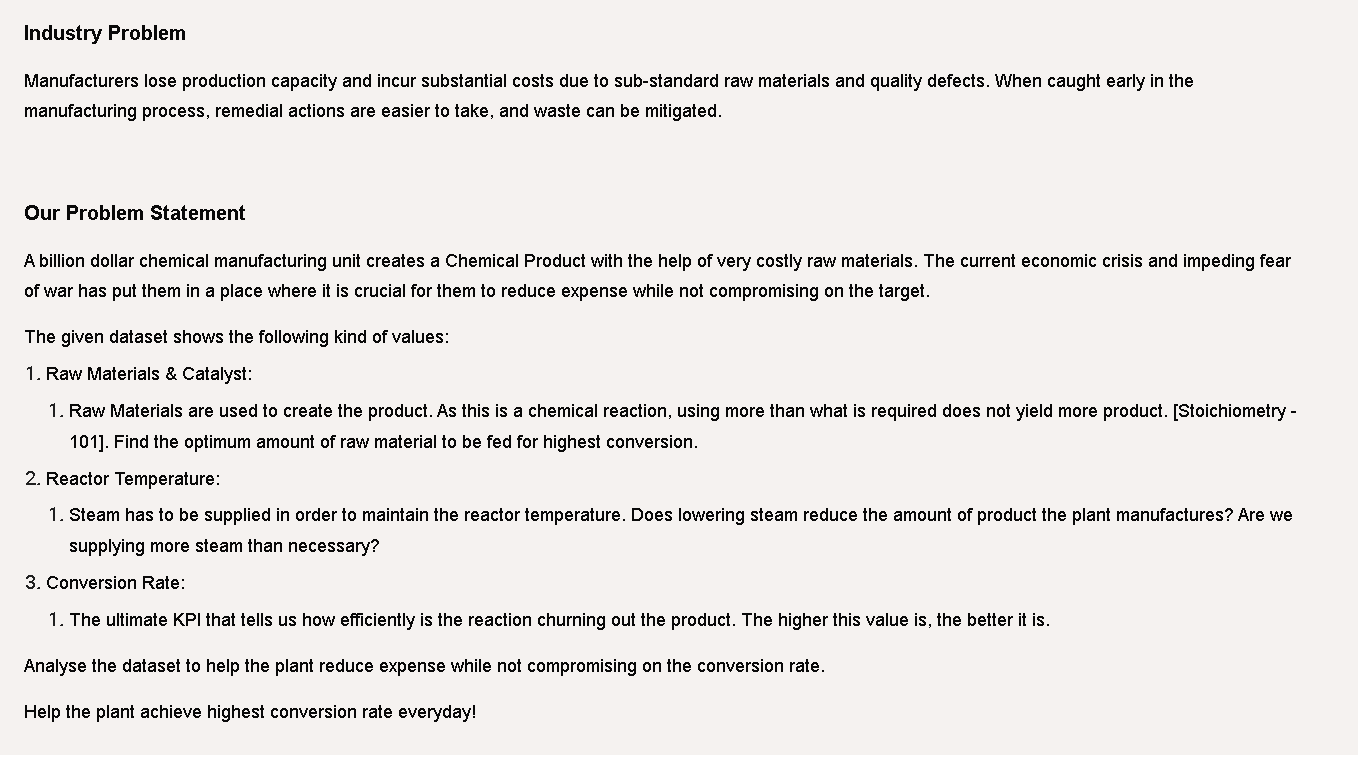

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('ChemicalReactor-Dataset.xlsx')
df.head()

,timestamp,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 04 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
0,2022-01-01 00:00:00,25.08,472871.77,10791.68,5745.18,0.0,57029.06,55469.53,89453.85
1,2022-02-01 00:00:00,25.11,460301.06,10791.05,6311.86,0.0,56949.94,54888.71,89423.89
2,2022-03-01 00:00:00,25.63,493577.83,10793.41,6312.29,0.0,57338.40,54887.71,89441.60
3,2022-04-01 00:00:00,25.58,513144.22,10794.50,6313.94,0.0,57447.42,54888.58,89382.46
4,2022-05-01 00:00:00,25.34,522227.51,10801.10,6311.53,0.0,56653.70,54888.14,89249.36


In [3]:
df.shape

(274, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  274 non-null    object 
 1   Conversion Rate (%)        269 non-null    float64
 2   Reactor Catalyst (kg/hr)   274 non-null    float64
 3   Reactor Temperature (¬∞C)  274 non-null    float64
 4   Raw Material - 05 (kg/hr)  274 non-null    float64
 5   Raw Material - 04 (kg/hr)  274 non-null    float64
 6   Raw Material - 03 (kg/hr)  274 non-null    float64
 7   Raw Material - 01 (kg/hr)  274 non-null    float64
 8   Raw Material - 02 (kg/hr)  274 non-null    float64
dtypes: float64(8), object(1)
memory usage: 19.4+ KB


In [5]:
100*(df.isnull().sum()/len(df))

timestamp                    0.000000
Conversion Rate (%)          1.824818
Reactor Catalyst (kg/hr)     0.000000
Reactor Temperature (¬∞C)    0.000000
Raw Material - 05 (kg/hr)    0.000000
Raw Material - 04 (kg/hr)    0.000000
Raw Material - 03 (kg/hr)    0.000000
Raw Material - 01 (kg/hr)    0.000000
Raw Material - 02 (kg/hr)    0.000000
dtype: float64

In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [7]:
print(df['Raw Material - 04 (kg/hr)'].min())
print(df['Raw Material - 04 (kg/hr)'].max())

0.0
0.0


Dropping raw Material 04 column as it is all 0

In [8]:
df = df.drop('Raw Material - 04 (kg/hr)', axis=1)

In [9]:
df.columns

Index(['timestamp', 'Conversion Rate (%)', 'Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 03 (kg/hr)', 'Raw Material - 01 (kg/hr)',
       'Raw Material - 02 (kg/hr)'],
      dtype='object')

In [10]:
# As only the Conversion rate column has missing values and it acoounts to only 1.8 %. We will drop these values
df = df.dropna()

In [11]:
df.describe()

,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,26.257249,800184.089108,10800.539926,1898.713792,53339.039405,56507.856654,86207.149033
std,1.578208,124232.524535,744.011767,2095.317092,4917.922223,5285.004724,7944.755159
min,13.120000,92136.050000,1700.210000,-193.290000,0.000000,55.170000,27.920000
25%,25.200000,745126.450000,10829.300000,-9.620000,51723.670000,55199.830000,85677.320000
50%,26.300000,803810.490000,10865.650000,2378.110000,54365.180000,57672.220000,88535.950000
75%,27.490000,895266.090000,10988.450000,2926.810000,55874.500000,58885.900000,89911.710000
max,28.480000,986160.940000,11061.840000,6556.070000,58152.360000,61440.140000,93501.050000


In [12]:
df.shape

(269, 8)

In [13]:
print(df['Raw Material - 05 (kg/hr)'].mean())
print(df['Raw Material - 05 (kg/hr)'].median())
print(df['Raw Material - 05 (kg/hr)'].mode())

1898.7137918215615
2378.11
0   -9.59
dtype: float64


<AxesSubplot:ylabel='Frequency'>

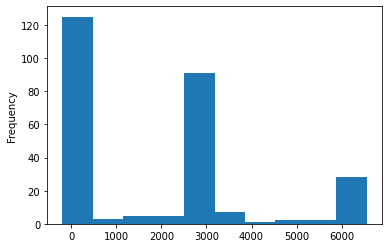

In [14]:
df['Raw Material - 05 (kg/hr)'].plot(kind='hist')

- We have lot of negative values in Raw Material - 05 .
- This looks like an error in dataset as  quantity of raw materials can never be negative.
- We cannot remove these rows as it will cost us to lose more than half of our data.
- Imputing these missing values either by median or mean. Lets use mean in our case.

In [15]:
mean =  df['Raw Material - 05 (kg/hr)'].mean()
mean

1898.7137918215615

In [16]:
df['Raw Material - 05 (kg/hr)'] = np.where(df['Raw Material - 05 (kg/hr)'] < 0, mean, df['Raw Material - 05 (kg/hr)'])

In [17]:
df.describe()

,Conversion Rate (%),Reactor Catalyst (kg/hr),Reactor Temperature (¬∞C),Raw Material - 05 (kg/hr),Raw Material - 03 (kg/hr),Raw Material - 01 (kg/hr),Raw Material - 02 (kg/hr)
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,26.257249,800184.089108,10800.539926,2708.336165,53339.039405,56507.856654,86207.149033
std,1.578208,124232.524535,744.011767,1471.553817,4917.922223,5285.004724,7944.755159
min,13.120000,92136.050000,1700.210000,32.910000,0.000000,55.170000,27.920000
25%,25.200000,745126.450000,10829.300000,1898.713792,51723.670000,55199.830000,85677.320000
50%,26.300000,803810.490000,10865.650000,2378.110000,54365.180000,57672.220000,88535.950000
75%,27.490000,895266.090000,10988.450000,2926.810000,55874.500000,58885.900000,89911.710000
max,28.480000,986160.940000,11061.840000,6556.070000,58152.360000,61440.140000,93501.050000


<AxesSubplot:ylabel='Frequency'>

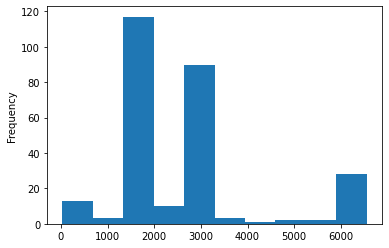

In [18]:
df['Raw Material - 05 (kg/hr)'].plot(kind='hist')

In [19]:
df.shape

(269, 8)

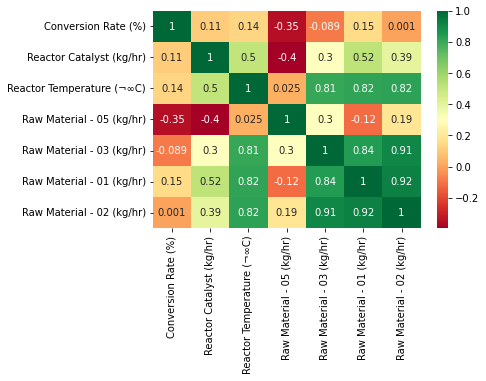

In [20]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

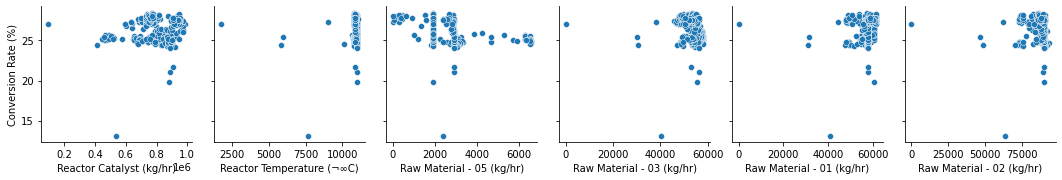

In [21]:
sns.pairplot(df, y_vars=['Conversion Rate (%)'], x_vars=['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'])
plt.show()

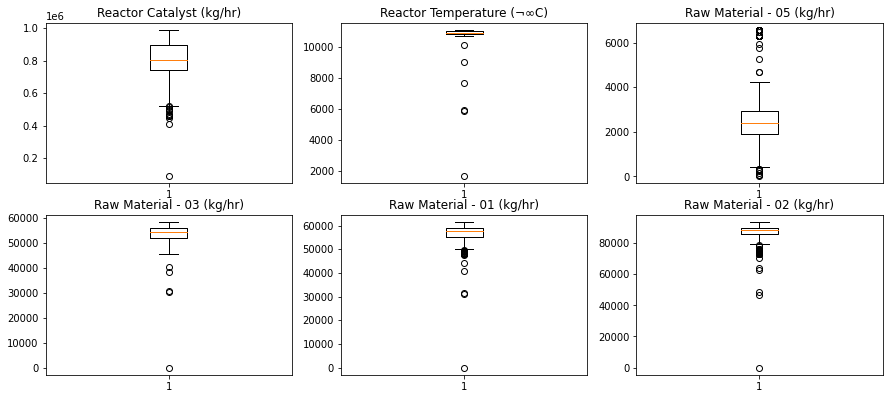

In [22]:
features = ['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
        'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)']
plt.figure(figsize=(15,10))
# loop through tickers and axes
for i in enumerate(features):
    # filter df for ticker and plot on specified axes
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(i[1], data=df)
    plt.title(i[1])

plt.show()

In [23]:
df.shape

(269, 8)

In [24]:
num_var = df.select_dtypes(include='float64')
num_var = num_var.columns
num_var

Index(['Conversion Rate (%)', 'Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 03 (kg/hr)', 'Raw Material - 01 (kg/hr)',
       'Raw Material - 02 (kg/hr)'],
      dtype='object')

In [25]:
# outlier treatment using I!R
for i in num_var:
    Q1 = df[i].quantile(0.05)
    Q3 = df[i].quantile(0.95)
    IQR = Q3 - Q1
    df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]

In [26]:
#Eliminating rows with less than 22% conversion rate
df = df[df['Conversion Rate (%)']>22]

In [27]:
df['timestamp'].dt.month

0      1
1      2
2      3
3      4
4      5
      ..
266    9
267    9
268    9
269    9
270    9
Name: timestamp, Length: 260, dtype: int64

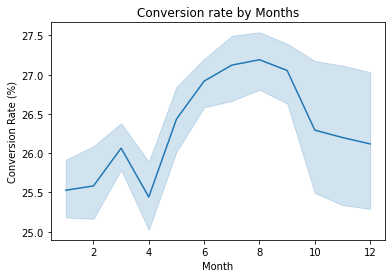

In [28]:
sns.lineplot(x=df['timestamp'].dt.month, y=df['Conversion Rate (%)'], data = df)
plt.xlabel('Month')
plt.title('Conversion rate by Months')
plt.show()

In [29]:
df.shape

(260, 8)

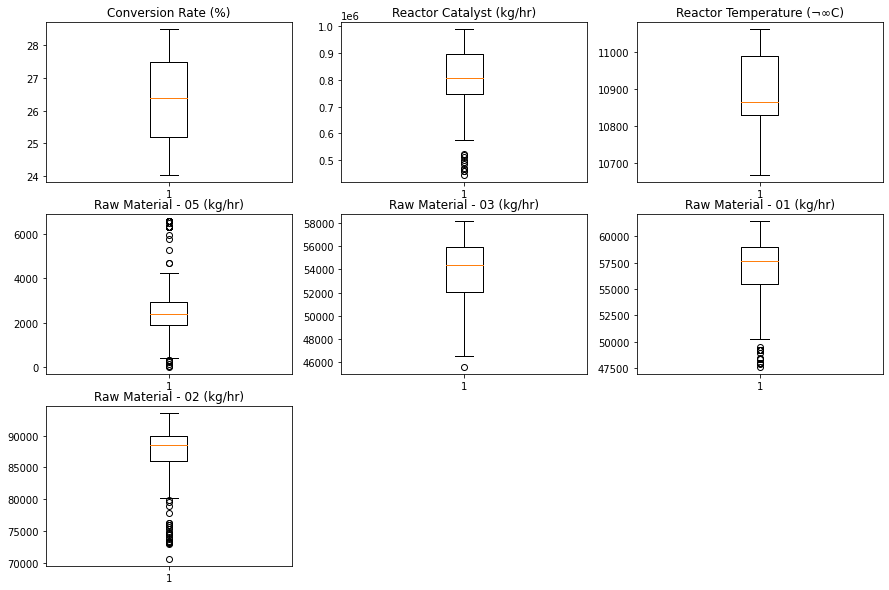

In [30]:
plt.figure(figsize=(15,10))
# loop through tickers and axes
for i in enumerate(num_var):
    # filter df for ticker and plot on specified axes
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(i[1], data=df)
    plt.title(i[1])

plt.show()

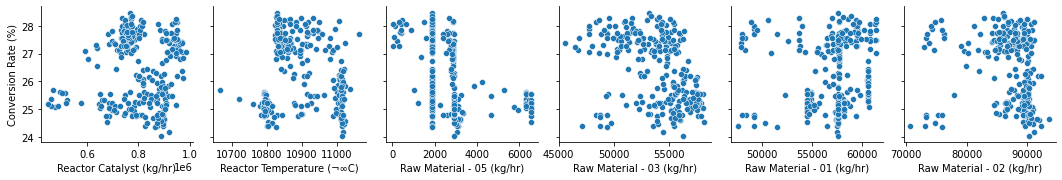

In [31]:
sns.pairplot(df, y_vars=['Conversion Rate (%)'], x_vars=['Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
        'Raw Material - 03 (kg/hr)',
       'Raw Material - 01 (kg/hr)', 'Raw Material - 02 (kg/hr)'])

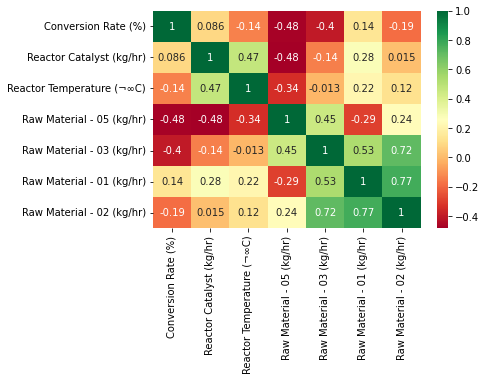

In [32]:
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [33]:
#There is very little correlation between target variable and feature variables

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.iloc[:,2:]
y= df.iloc[:, 1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.7, random_state=100)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(182, 6)
(78, 6)
(182,)
(78,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model 
print('Linear Regression','\n','R2 score: ',r2_score(y_test, ypred),'\n MAE    : ', mean_absolute_error(y_test, ypred),'\n MSRE     : ', np.sqrt(mean_squared_error(y_test, ypred)))


Linear Regression 
 R2 score:  0.47180249936248886 
 MAE    :  0.7850812586405062 
 MSRE     :  0.9409706392995251


In [39]:
print(lr.intercept_)
print(lr.coef_)

61.93524331815941
[-1.08520282e-06 -2.72840165e-03 -4.57162830e-06 -2.56063559e-04
  2.79403773e-04 -8.15975474e-05]


Text(0, 0.5, 'ypred')

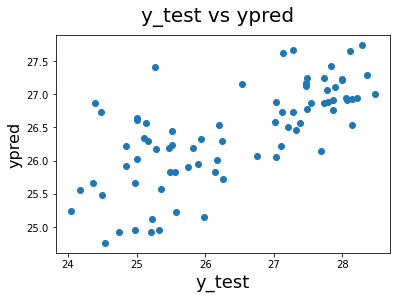

In [40]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, ypred)
fig.suptitle('y_test vs ypred', fontsize = 20)          # Plot heading 
plt.xlabel('y_test', fontsize = 18)                     # X-label
plt.ylabel('ypred', fontsize = 16)  

#### We are getting only 0.47 R2 score which was expected as there is no high correlation between independent and dependent features
#### Lets check with tandom Forest regressor model

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rfr = RandomForestRegressor(random_state=100)

In [43]:
rfm = rfr.fit(X_train, y_train)

In [44]:
print('The training score is: %.2f'%rfm.score(X_train, y_train))

The training score is: 0.95


In [45]:
ytrain_pred = rfm.predict(X_train)

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

In [47]:
ytrain_pred = rfm.predict(X_train)

In [48]:
print('The training MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

print('The training MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

print('The training EV is: %.2f'% explained_variance_score(y_train, ytrain_pred))

print('The training r2_score is: %.2f'% r2_score(y_train, ytrain_pred))

The training MAE is: 0.17
The training MSE is: 0.07
The training EV is: 0.95
The training r2_score is: 0.95


In [49]:
ytest_pred = rfm.predict(X_test)

ytest_pred[:10]

array([26.7048, 25.4797, 27.4966, 27.8554, 27.6993, 25.505 , 24.8001,
       24.9119, 27.3479, 27.6183])

In [50]:
print (f'Train Accuracy - : {rfm.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rfm.score(X_test,y_test):.3f}')

Train Accuracy - : 0.954
Test Accuracy - : 0.771


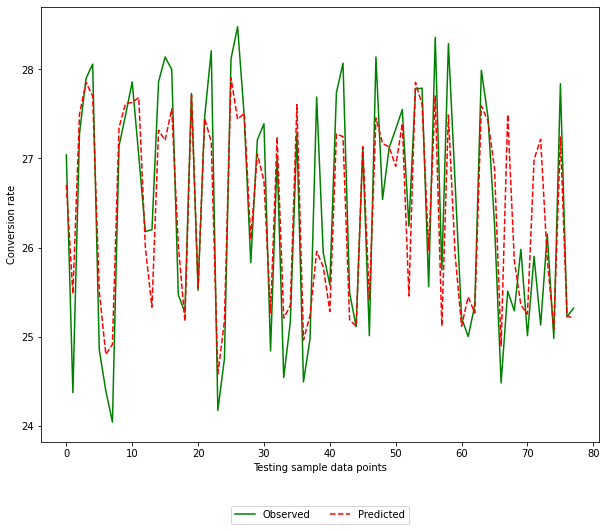

In [51]:
plt.figure(figsize=(10,8))
x_axis = range(len(X_test))

plt.plot(x_axis, y_test, label='Observed', color='green', linestyle='-')
plt.plot(x_axis, ytest_pred, label='Predicted', color='r', linestyle='--')

plt.ylabel('Conversion rate')
plt.xlabel('Testing sample data points')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2)
plt.show()

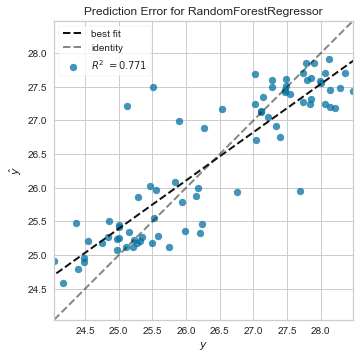

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rfm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

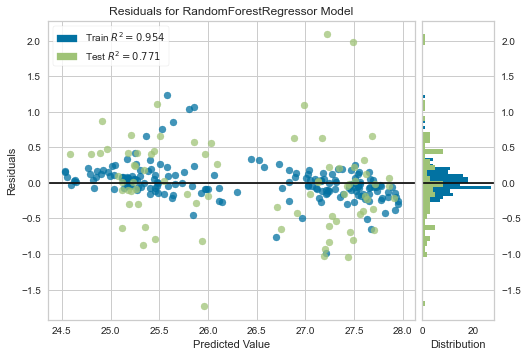

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [53]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rfm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [54]:
feature_list = list(X.columns)
feature_importance = pd.Series(rfm.feature_importances_, index=feature_list).sort_values(ascending=False)

In [55]:
print(feature_importance)

Raw Material - 05 (kg/hr)    0.412733
Reactor Temperature (¬∞C)    0.311427
Raw Material - 03 (kg/hr)    0.101302
Raw Material - 01 (kg/hr)    0.068175
Raw Material - 02 (kg/hr)    0.054141
Reactor Catalyst (kg/hr)     0.052223
dtype: float64


#### Hyperparameter tuning using GridSearch CV

In [56]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 25, stop = 100, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [2,4, 6]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [57]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [58]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [59]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=100), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [60]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 25}

In [61]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.811
Test Accuracy - : 0.759


In [62]:
ytest_grid_pred = rf_Grid.predict(X_test)
ytest_grid_pred[:10]

array([26.93623097, 25.41858842, 27.41056849, 27.60516821, 27.60516821,
       25.43274646, 24.90252629, 24.92895753, 27.35329206, 27.48968382])

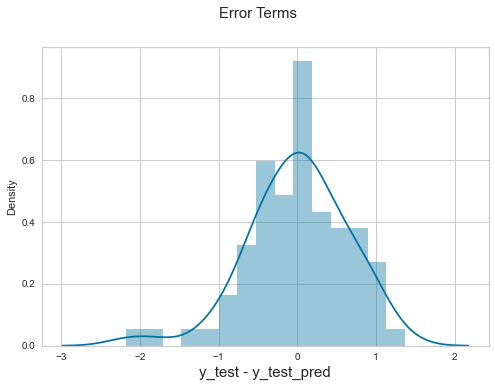

In [63]:
res = (y_test - ytest_grid_pred)
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

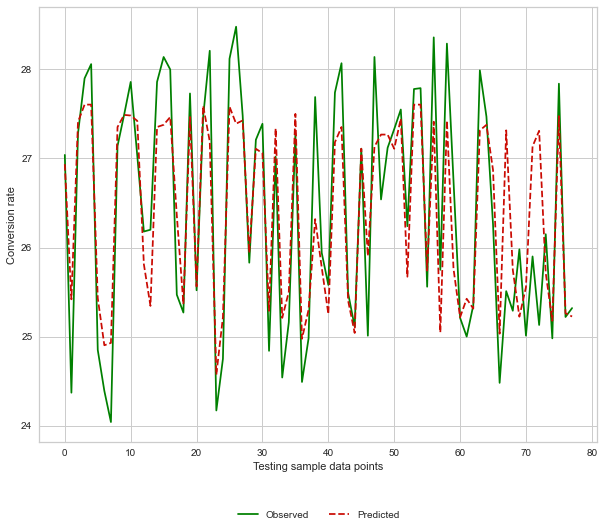

In [64]:
plt.figure(figsize=(10,8))
x_axis = range(len(X_test))

plt.plot(x_axis, y_test, label='Observed', color='green', linestyle='-')
plt.plot(x_axis, ytest_grid_pred, label='Predicted', color='r', linestyle='--')

plt.ylabel('Conversion rate')
plt.xlabel('Testing sample data points')

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2)
plt.show()

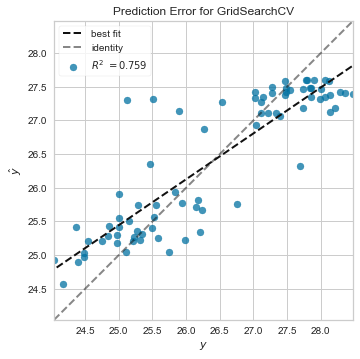

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [65]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(rf_Grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

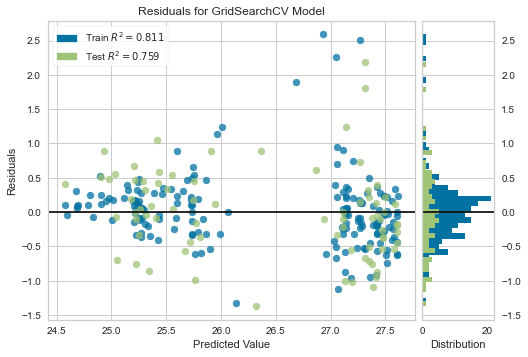

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(rf_Grid)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [67]:
rf_Grid.best_estimator_.feature_importances_

array([0.03902099, 0.3009847 , 0.48500465, 0.09935405, 0.05102372,
       0.02461188])

In [68]:
feature_list = list(X.columns)
feature_importance = pd.Series(rf_Grid.best_estimator_.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_importance)

Raw Material - 05 (kg/hr)    0.485005
Reactor Temperature (¬∞C)    0.300985
Raw Material - 03 (kg/hr)    0.099354
Raw Material - 01 (kg/hr)    0.051024
Reactor Catalyst (kg/hr)     0.039021
Raw Material - 02 (kg/hr)    0.024612
dtype: float64


Text(0.5, 0, 'Random Forest Feature Importance')

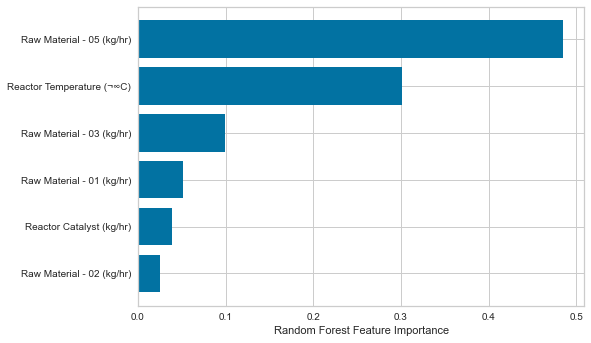

In [69]:
sorted_idx = rf_Grid.best_estimator_.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_Grid.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [70]:
# !pip install shapash

# Shapash is a Python library which aims to make machine learning interpretable and understandable to everyone. 
# Shapash provides several types of visualization which displays explicit labels that everyone can understand. 
# Data Scientists can more easily understand their models and share their results. 
# End users can understand the decision proposed by a model using a summary of the most influential criteria.

Building a Random Forest Regressor model using Best parameters derived from Grid search CV for our Shapash library 
- With the help of this library we are able to better interpret our model
- CLick on server link belo (127.0.0...) which takes you tabe web server with analysis based on our RF regressor model

In [71]:
rfr_best = RandomForestRegressor(bootstrap= True,
 max_depth= 4,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 25)

In [72]:
rfr_best.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=25)

In [73]:
ytrain_pred_best = rfr_best.predict(X_train)

In [74]:
print (f'Train Accuracy - : {rfr_best.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rfr_best.score(X_test,y_test):.3f}')

Train Accuracy - : 0.803
Test Accuracy - : 0.758


In [75]:
rfr_best.feature_importances_

feature_list = list(X.columns)
feature_importance = pd.Series(rfr_best.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_importance)

Raw Material - 05 (kg/hr)    0.483449
Reactor Temperature (¬∞C)    0.361566
Raw Material - 03 (kg/hr)    0.062028
Raw Material - 02 (kg/hr)    0.037628
Raw Material - 01 (kg/hr)    0.036082
Reactor Catalyst (kg/hr)     0.019248
dtype: float64


Text(0.5, 0, 'Random Forest Feature Importance')

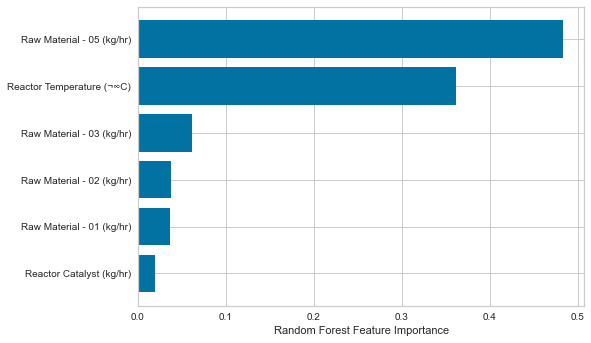

In [76]:
sorted_idx = rfr_best.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfr_best.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [77]:
from shapash.explainer.smart_explainer import SmartExplainer

In [78]:
xpl = SmartExplainer(rfr_best)

In [79]:
xpl.compile(
    x=X_test,y_target=y_test
)

In [80]:
xpl

In [81]:
app = xpl.run_app(title_story='Chemical Reaction conversion')

INFO:root:Your Shapash application run on http://LAPTOP-AQENRK4J:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://192.168.0.100:8050


In [82]:
df.columns

INFO:werkzeug:Press CTRL+C to quit


Index(['timestamp', 'Conversion Rate (%)', 'Reactor Catalyst (kg/hr)',
       'Reactor Temperature (¬∞C)', 'Raw Material - 05 (kg/hr)',
       'Raw Material - 03 (kg/hr)', 'Raw Material - 01 (kg/hr)',
       'Raw Material - 02 (kg/hr)'],
      dtype='object')

INFO:werkzeug:127.0.0.1 - - [19/Nov/2022 15:26:32] "GET /assets/material-icons.css?m=1668700533.2234402 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Nov/2022 15:26:32] "GET /assets/style.css?m=1668700533.2294397 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Nov/2022 15:26:32] "GET /assets/jquery.js?m=1668700533.2214398 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Nov/2022 15:26:32] "GET /assets/main.js?m=1668700533.222439 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [19/Nov/2022 15:26:32] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Nov/2022 15:26:32] "GET /_dash-layout HTTP/1.1" 200 -
